# Data exploration 

In [1]:
# Basic imports
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
# import cleaned and outlier corrected data
df = pd.read_csv("data/data_clean.csv", index_col=0) 

# set random state
RSEED = 42

In [3]:
# randomly subset data for initial plots 
subset = df.sample(n=1000, random_state=RSEED, axis=0)

In [4]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 56351 to 149839
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   backers_count         1000 non-null   int64  
 1   country               1000 non-null   object 
 2   id                    1000 non-null   int64  
 3   name                  1000 non-null   object 
 4   staff_pick            1000 non-null   int64  
 5   state                 1000 non-null   int64  
 6   usd_pledged           1000 non-null   float64
 7   usd_type              1000 non-null   object 
 8   yr_launched           1000 non-null   int64  
 9   mo_launched           1000 non-null   int64  
 10  wd_launched           1000 non-null   int64  
 11  yr_deadline           1000 non-null   int64  
 12  mo_deadline           1000 non-null   int64  
 13  wd_deadline           1000 non-null   int64  
 14  founding_phase        1000 non-null   int64  
 15  phase_before   

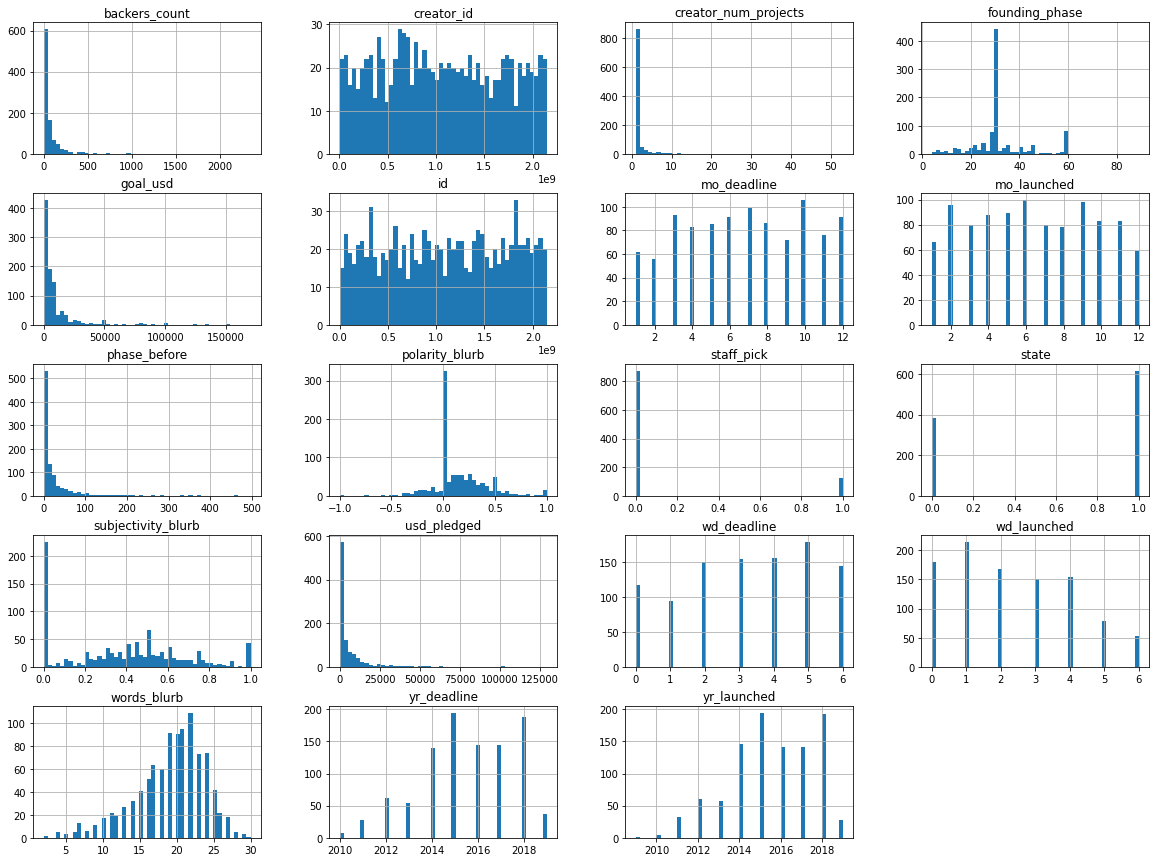

In [5]:
subset.hist(bins=50, figsize = (20,15))
plt.show()

In [6]:
subset.describe().round(2)

,backers_count,id,staff_pick,state,usd_pledged,yr_launched,mo_launched,wd_launched,yr_deadline,mo_deadline,wd_deadline,founding_phase,phase_before,goal_usd,creator_id,creator_num_projects,words_blurb,polarity_blurb,subjectivity_blurb
count,1000.00,1.000000e+03,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1.000000e+03,1000.00,1000.00,1000.00,1000.00
mean,94.09,1.093680e+09,0.12,0.62,7013.36,2015.51,6.41,2.33,2015.56,6.77,3.26,31.77,31.93,10905.80,1.058656e+09,2.06,19.07,0.15,0.39
std,226.56,6.250177e+08,0.33,0.49,15059.30,2.06,3.32,1.77,2.06,3.33,1.93,11.84,65.72,20117.44,6.163093e+08,3.25,4.78,0.25,0.29
min,0.00,1.314084e+06,0.00,0.00,0.00,2009.00,1.00,0.00,2010.00,1.00,0.00,4.00,0.00,10.00,4.306813e+06,1.00,2.00,-1.00,0.00
25%,4.00,5.518075e+08,0.00,0.00,175.75,2014.00,4.00,1.00,2014.00,4.00,2.00,29.00,2.00,1250.00,5.562351e+08,1.00,16.00,0.00,0.10
50%,30.00,1.105686e+09,0.00,1.00,1614.68,2016.00,6.00,2.00,2016.00,7.00,3.00,30.00,8.00,4500.00,1.033156e+09,1.00,20.00,0.09,0.40
75%,83.25,1.658192e+09,0.00,1.00,7224.43,2017.00,9.00,4.00,2017.00,10.00,5.00,32.25,28.00,10000.00,1.597230e+09,2.00,22.00,0.29,0.57
max,2345.00,2.144192e+09,1.00,1.00,129271.79,2019.00,12.00,6.00,2019.00,12.00,6.00,89.00,497.00,170000.00,2.146111e+09,53.00,30.00,1.00,1.00


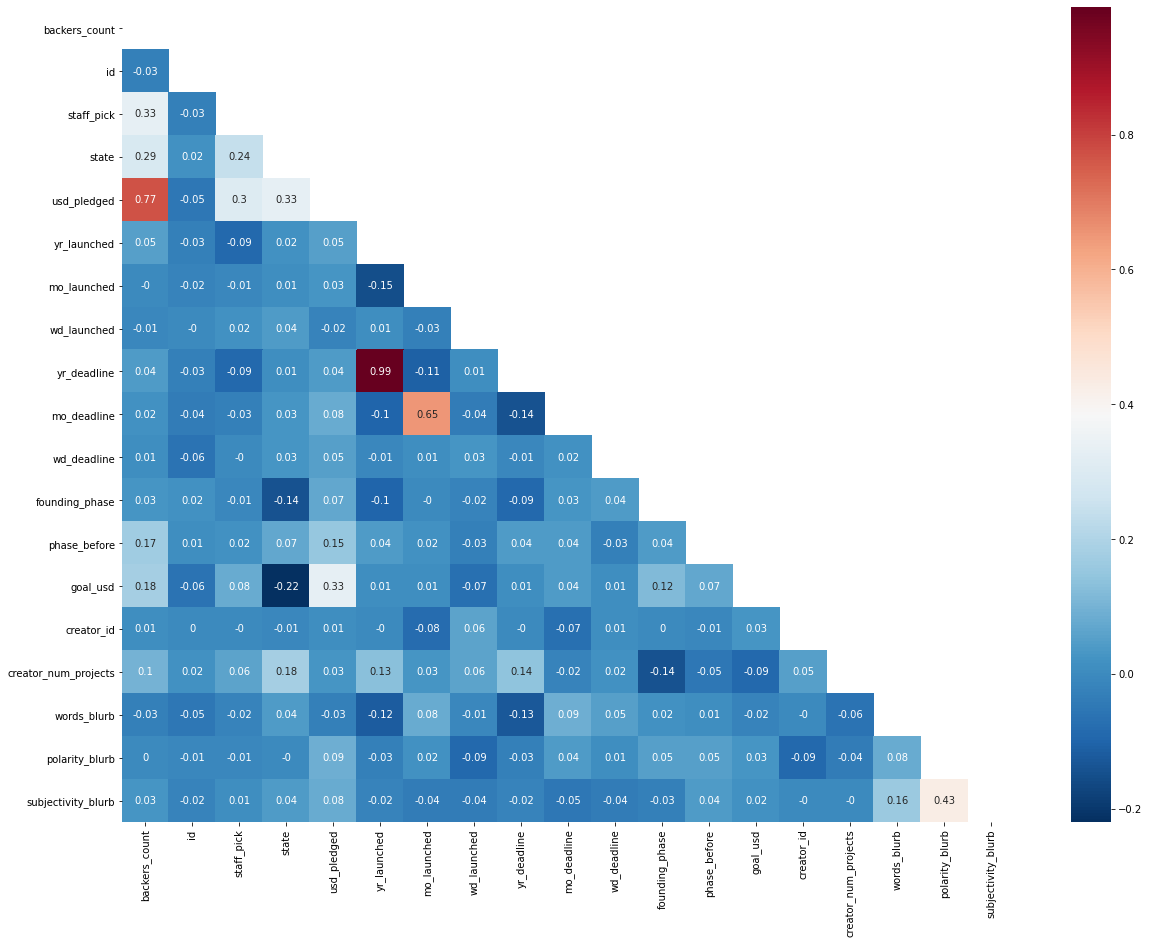

In [7]:
mask = np.triu(subset.corr())
plt.figure(figsize = (20,15))
ax = sns.heatmap(round(subset.corr(), 2)
                 ,annot=True
                 ,mask=mask
                 ,cmap='RdBu_r')

In [8]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 56351 to 149839
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   backers_count         1000 non-null   int64  
 1   country               1000 non-null   object 
 2   id                    1000 non-null   int64  
 3   name                  1000 non-null   object 
 4   staff_pick            1000 non-null   int64  
 5   state                 1000 non-null   int64  
 6   usd_pledged           1000 non-null   float64
 7   usd_type              1000 non-null   object 
 8   yr_launched           1000 non-null   int64  
 9   mo_launched           1000 non-null   int64  
 10  wd_launched           1000 non-null   int64  
 11  yr_deadline           1000 non-null   int64  
 12  mo_deadline           1000 non-null   int64  
 13  wd_deadline           1000 non-null   int64  
 14  founding_phase        1000 non-null   int64  
 15  phase_before   

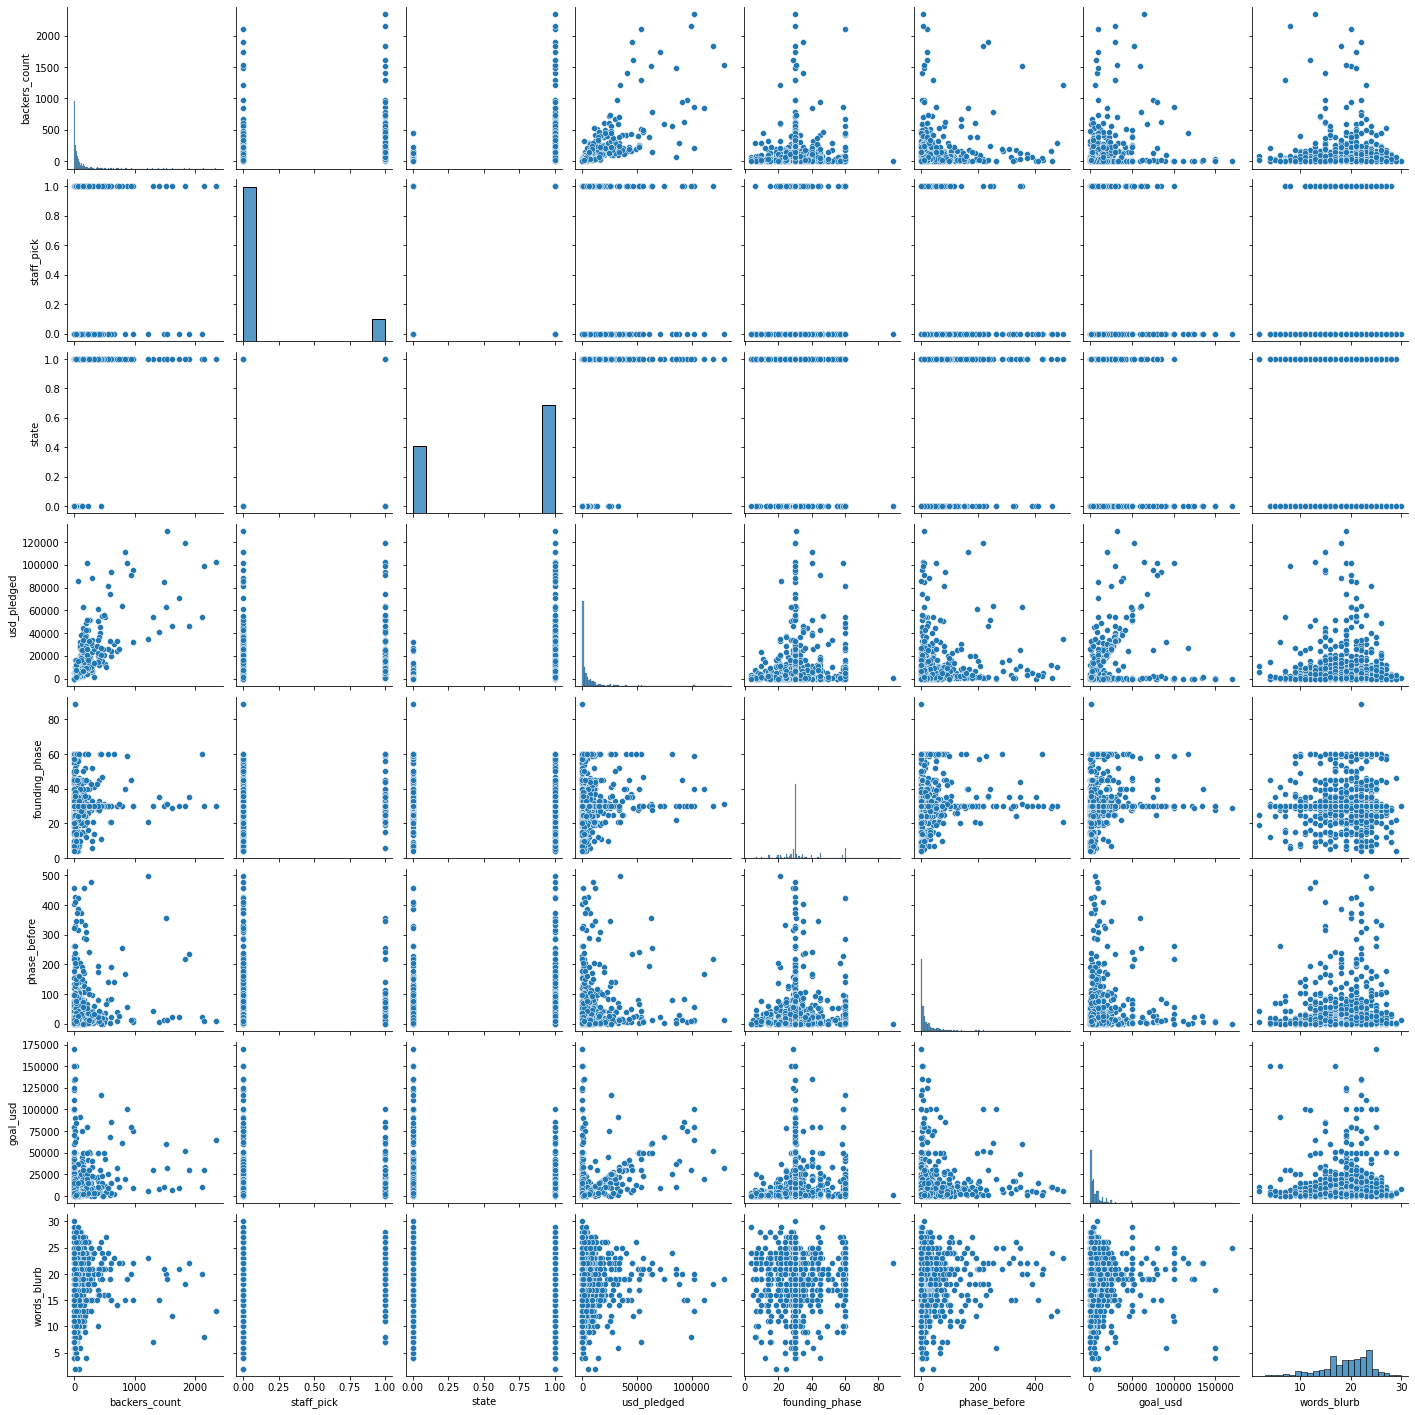

In [9]:
columns_intrest = ['backers_count', 'staff_pick', 'state', 'usd_pledged', 'founding_phase', 'phase_before', 'goal_usd', 'words_blurb']

# geting a feeling of the data
subset_features = subset[columns_intrest]
sns.pairplot(subset_features);

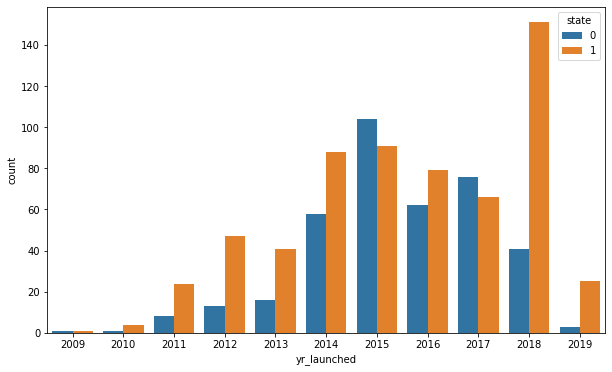

In [10]:
plt.figure(figsize=(10,6));
sns.countplot(x='yr_launched', hue='state', data=subset);

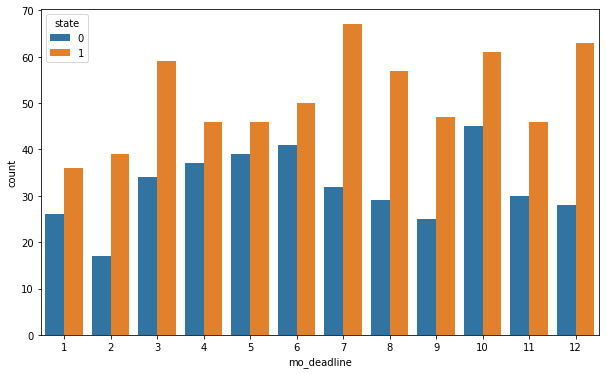

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x='mo_deadline', hue='state', data=subset);

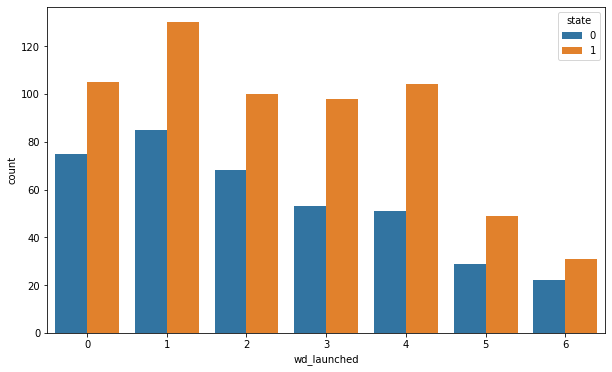

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='wd_launched', hue='state', data=subset);

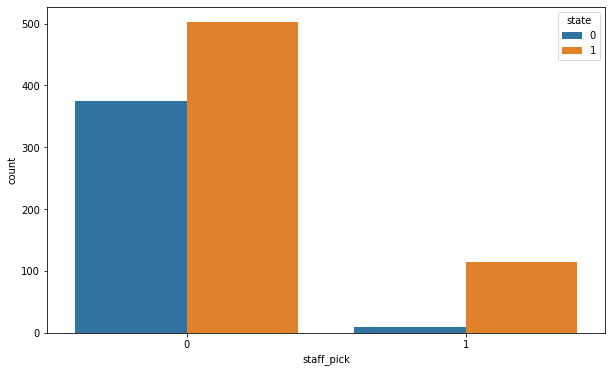

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x='staff_pick', hue='state', data=subset);

In [14]:
#plt.figure(figsize=(10,6))
#sns.catplot(x='wd_deadline', hue='state', row='yr_deadline', kind='count' ,data=subset)

<Figure size 720x432 with 0 Axes>

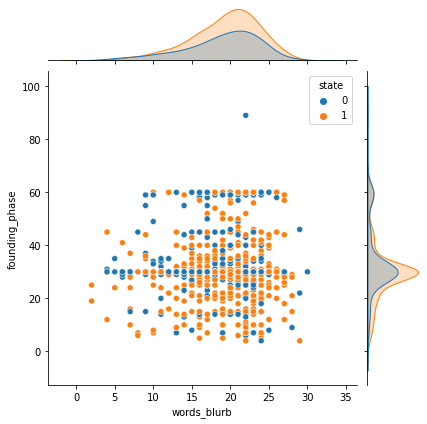

In [15]:
plt.figure(figsize=(10,6))
sns.jointplot(data = subset, x = "words_blurb", y = "founding_phase", hue = "state")

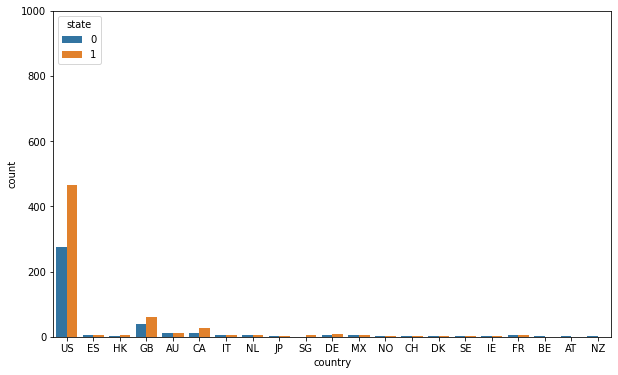

In [16]:
plt.figure(figsize=(10,6));
sns.countplot(x='country', hue='state', data=subset);
plt.ylim(0,1000);

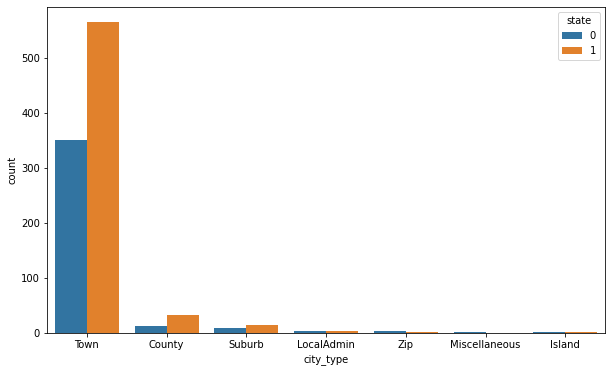

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='city_type', hue='state', data=subset);

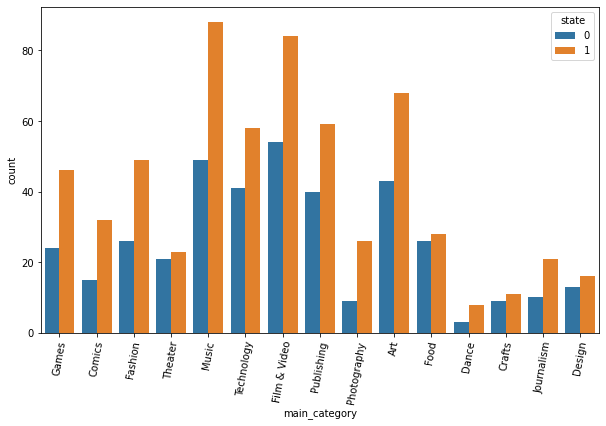

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='main_category', hue='state', data=subset);
plt.xticks(rotation='80');